In [1]:
import numpy as np
from scipy import stats

In [2]:
def gauss_ring_logp(x, y, mean_radius=1, std=0.02):
    """
    Defines a gaussian ring likelihood in cartesian coordinates,
    around some ``mean_radius`` and with some ``std``.
    """
    return stats.norm.logpdf(np.sqrt(x**2 + y**2), loc=mean_radius, scale=std)

In [3]:
info = {"likelihood": {"ring": gauss_ring_logp}}

In [4]:
info["params"] = {
    "x": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01},
    "y": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01}}

In [5]:
def get_r(x, y):
    return np.sqrt(x ** 2 + y ** 2)

def get_theta(x, y):
    return np.arctan(y / x)

info["params"]["r"] = {"derived": get_r}
info["params"]["theta"] = {"derived": get_theta,
                           "latex": r"\theta", "min": 0, "max": np.pi/2}

In [ ]:
info["sampler"] = {"mcmc": {"Rminus1_stop": 0.001, "max_tries": 1000}}

from cobaya import run
updated_info, sampler = run(info)

[mcmc] *WARNING* When combining chains, it is recommended to remove some initial fraction, e.g. 'skip_samples=0.3'


(2, 1)

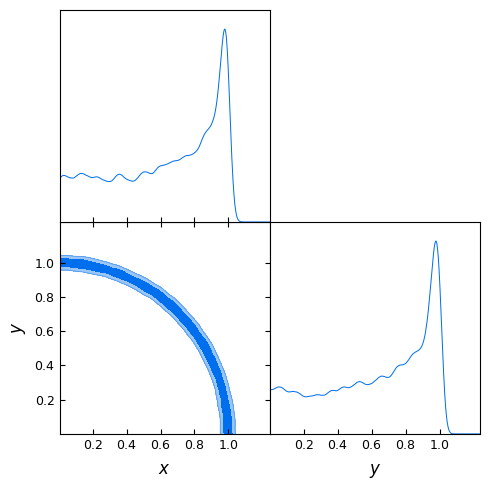

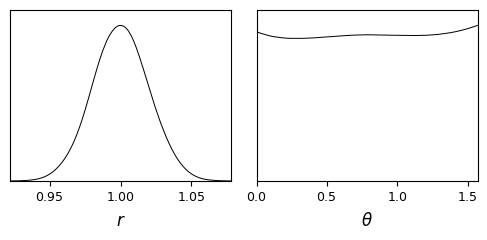

In [9]:
import getdist.plots as gdplt

gdsamples = sampler.products(to_getdist=True)["sample"]
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples, ["x", "y"], filled=True)
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.plots_1d(gdsamples, ["r", "theta"], nx=2)